<a href="https://colab.research.google.com/github/Ketan-Dhakate/palnts-disease-identification/blob/main/Copy_of_Ketan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
print(tf.__version__)

2.9.1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading new-plant-diseases-dataset.zip to ./new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:28<00:00, 100MB/s]


In [ ]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,1642 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories,1774 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch
There are 0 directories,1907 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_
There are 0 directories,1888 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot
There are 0 directories,1838 images in /content/new-plant-diseases-dataset/New 

In [ ]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,410 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories,444 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch
There are 0 directories,477 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_
There are 0 directories,472 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Grape___Black_rot
There are 0 directories,459 images in /content/new-plant-diseases-dataset/New Plant 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
train_data,test_data

(<keras.preprocessing.image.DirectoryIterator at 0x7f0d48c0db70>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f0d6002b610>)

In [ ]:
class_names = list(train_data.class_indices.keys())
print(class_names)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

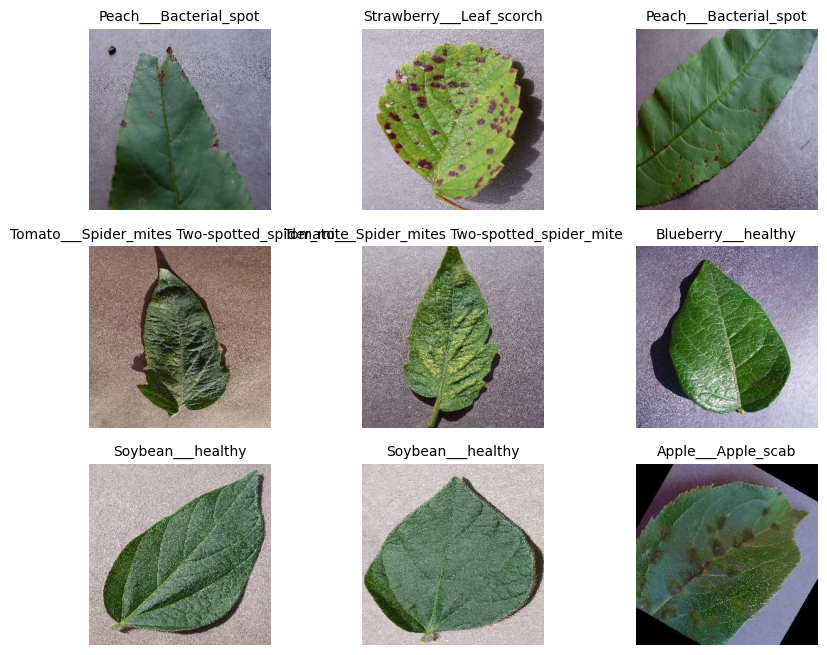

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
initial_epochs = 1

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])


Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20231227-161101
   8/2197 [..............................] - ETA: 3:07:06 - loss: 3.7247 - accuracy: 0.0273

KeyboardInterrupt: ignored

In [ ]:

feature_model.load_weights(checkpoint_path)


NotFoundError: ignored

In [ ]:
feature_model.evaluate(test_data)

ImportError: ignored

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

In [ ]:
plot_history(history1)


NameError: ignored

In [ ]:


feature_model.save('best_plant_model.h5')


In [ ]:
tf.keras.models.save_model(feature_model,'my_model2.hdf5')

In [ ]:
import pickle

In [ ]:
pickle.dump(history1)

NameError: ignored

In [ ]:
cd

/root


In [ ]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

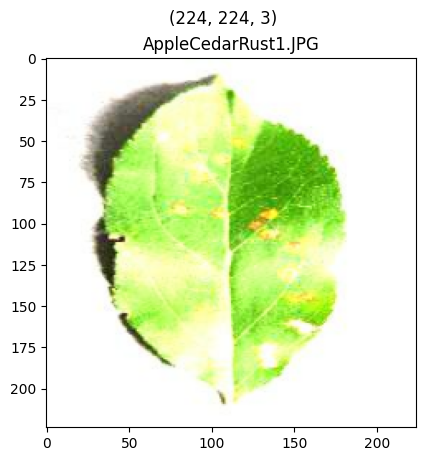

In [ ]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [ ]:
import tensorflow as tf
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred


ImportError: ignored

In [ ]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)


AttributeError: ignored

In [ ]:
random_image_predict(feature_model)

NameError: ignored

NameError: ignored

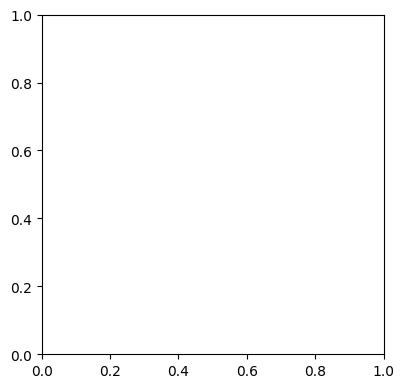

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 91ms/step


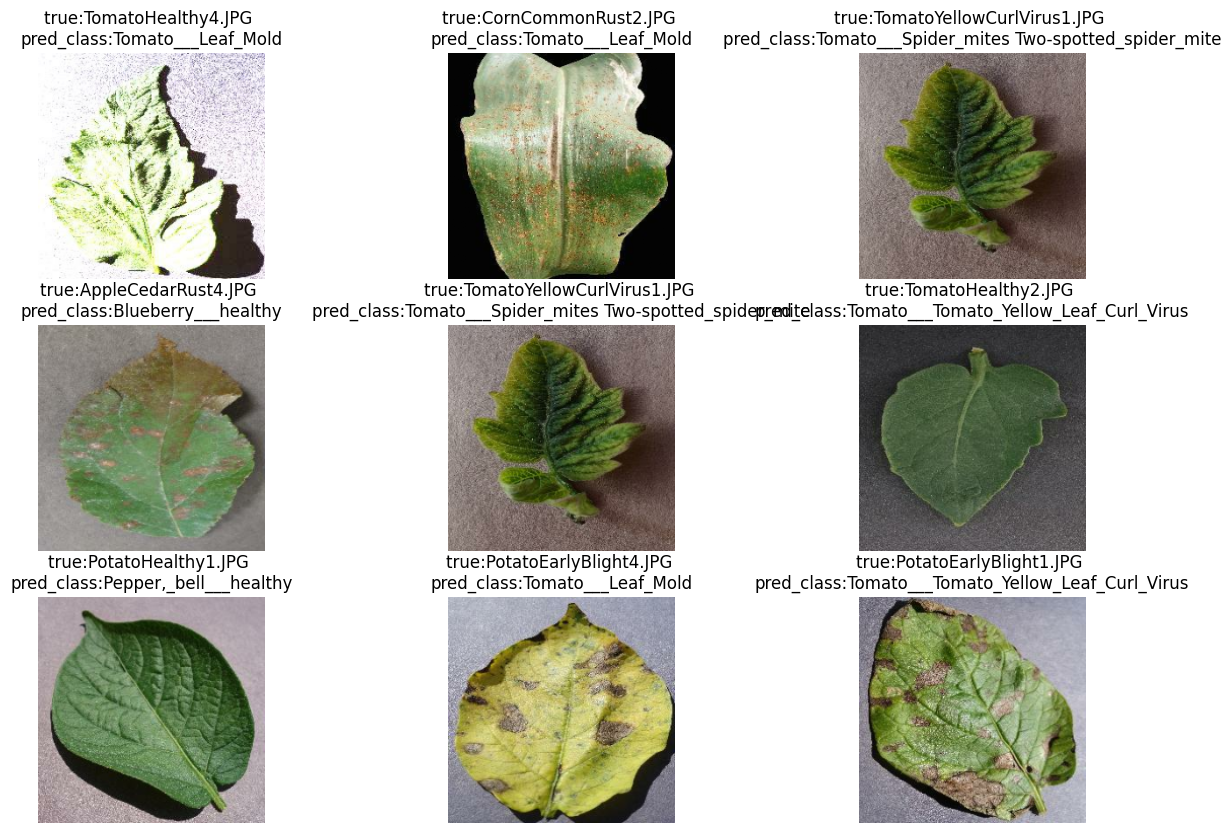

In [ ]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)

In [ ]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [ ]:
!wget https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg

--2023-05-05 15:27:20--  https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg
Resolving www.apsnet.org (www.apsnet.org)... 3.216.53.172
Connecting to www.apsnet.org (www.apsnet.org)|3.216.53.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30646 (30K) [image/jpeg]
Saving to: ‘AppleScab03.jpg’

AppleScab03.jpg     100%[===================>]  29.93K  --.-KB/s    in 0.03s   

2023-05-05 15:27:20 (996 KB/s) - ‘AppleScab03.jpg’ saved [30646/30646]



1/1 [==============================] - 0s 88ms/step


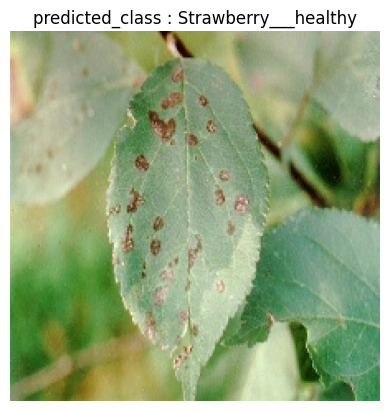

In [ ]:
predict_img('AppleScab03.jpg')

In [ ]:
!pip install protobuf==3.20.0

# ***Deploy***

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np

class_names = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust",
               "Apple___healthy", "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_",
               "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy", "Grape___Black_rot",
               "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Grape___healthy",
               "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
               "Pepper,_bell___Bacterial_spot", "Potato___Early_blight", "Potato___Late_blight",
               "Potato___healthy", "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew",
               "Strawberry___Leaf_scorch", "Strawberry___healthy", "Tomato___Bacterial_spot",
               "Tomato___Early_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
               "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot",
               "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus", "Tomato___healthy"]

class SessionState:
    def __init__(self):
        self.cache = {}

# Create a SessionState object
session_state = SessionState()

def load_model():
    model = tf.keras.models.load_model('/content/best_plant_model.h5')
    return model

def get_model():
    if 'model' not in session_state.cache:
        session_state.cache['model'] = load_model()
    return session_state.cache['model']

model = get_model()

st.write("""
         # Leaf disease detection
         """
         )

file = st.file_uploader("Please upload a brain scan file", type=["jpg", "png"])

st.set_option('deprecation.showfileUploaderEncoding', False)

def import_and_predict(image_data, model):
    size = (224, 224)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]
    pred = model.predict(img_reshape)
    return pred

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    predicted_class_index = np.argmax(score)
    predicted_class_name = class_names[predicted_class_index]
    st.write("Predicted Class:", predicted_class_name)





Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np

class_names = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust",
               "Apple___healthy", "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_",
               "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy", "Grape___Black_rot",
               "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Grape___healthy",
               "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
               "Pepper,_bell___Bacterial_spot", "Potato___Early_blight", "Potato___Late_blight",
               "Potato___healthy", "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew",
               "Strawberry___Leaf_scorch", "Strawberry___healthy", "Tomato___Bacterial_spot",
               "Tomato___Early_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
               "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot",
               "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus", "Tomato___healthy"]

# Create a SessionState object
class SessionState:
    def __init__(self):
        self.cache = {}


# Create a SessionState object
session_state = SessionState()

def load_model():
    model = tf.keras.models.load_model('/content/best_plant_model.h5')
    return model

def get_model():
    if 'model' not in session_state.cache:
        session_state.cache['model'] = load_model()
    return session_state.cache['model']

model = get_model()

st.write("""
         # Leaf disease detection
         """
         )

file = st.file_uploader("Please upload a leaf image file", type=["jpg", "png"])

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)

    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]

    predictions = model.predict(img_reshape)
    score = tf.nn.softmax(predictions[0])

    st.write(predictions)
    st.write(score)

    predicted_class_index = np.argmax(score)
    predicted_class_name = class_names[predicted_class_index]
    st.write("Predicted Class:", predicted_class_name)


Overwriting app.py


In [ ]:
from pyngrok import ngrok


ngrok.set_auth_token("2Z9fsCdvAW1Z6r8dJGGMl5rGsrv_4yQMTwYueSez9qkgXLj7T")
# Then call the pyngrok method throwing the error, for example
url = ngrok.connect(8501).public_url
print(url)

https://7eee-34-75-17-201.ngrok-free.app


In [ ]:
!ngrok config add-authtoken 2PManWbX9xCVK0axH4R5uKDohgl_5mecrjc6G1R3y6vFcjzqC

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!pip install pyngrok

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-12-27 16:29:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.28M  34.3MB/s    in 0.4s    

2023-12-27 16:29:22 (34.3 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.75.17.201:8502



In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.184.174.247:8501

  Stopping...
  Stopping...
Exception ignored in atexit callback: <function shutdown at 0x7f2a09e92a70>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 2181, in shutdown
    h.acquire()
  File "/usr/lib/python3.10/logging/__init__.py", line 917, in acquire
    self.lock.acquire()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 69, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/server.py", line 401, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 322, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 798, in call_soon_threadsafe
    self._check_closed()
  File "/usr/li

In [ ]:
!streamlit run /content/app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/app.py
